In [1]:
import pywt
import torch
import numpy as np
from models import get_model
from torchview import draw_graph

In [2]:
x = np.random.randn(1, 1, 256, 256).astype(np.float32)
print(x.dtype)
x1, _ = pywt.dwt2(x, 'db1')
x2, _ = pywt.dwt2(x1, 'db1')
x3, _ = pywt.dwt2(x2, 'db1')
x4, _ = pywt.dwt2(x3, 'db1')

float32


In [3]:
x = torch.from_numpy(x)
print(x.dtype)
x1 = torch.from_numpy(x1)
x2 = torch.from_numpy(x2)
x3 = torch.from_numpy(x3)
x4 = torch.from_numpy(x4)

torch.float32


In [4]:
# Simulate input data with wavelet decomposition
input_data = [(x, x1, x2, x3, x4)]
# input_data = x

Initializing Unet model, wavelets mode: 3


/home/masuarez/tools/anaconda3/envs/py3.9-pt/lib/python3.9/site-packages/torch/nn/init.py:453: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Base encoder block forward
x:  torch.Size([1, 1, 256, 256])
pool mode:  0
x before block:  torch.Size([1, 1, 256, 256])
x after block:  torch.Size([1, 64, 256, 256])
Base encoder block forward
x:  torch.Size([1, 64, 256, 256])
x:  torch.Size([1, 1, 128, 128])
pool mode:  0
x pool:  torch.Size([1, 64, 128, 128])
BaseEncoderBlock forward
w:  torch.Size([1, 1, 128, 128])
Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
)
w:  torch.Size([1, 64, 128, 128])
x:  torch.Size([1, 64, 128, 128])
concat:  torch.Size([1, 128, 128, 128])
x before block:  torch.Size([1, 128, 128, 128])


[W1014 13:05:33.259194729 NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


x after block:  torch.Size([1, 128, 128, 128])
Base encoder block forward
x:  torch.Size([1, 128, 128, 128])
x:  torch.Size([1, 1, 64, 64])
pool mode:  0
x pool:  torch.Size([1, 128, 64, 64])
BaseEncoderBlock forward
w:  torch.Size([1, 1, 64, 64])
Sequential(
  (0): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
)
w:  torch.Size([1, 128, 64, 64])
x:  torch.Size([1, 128, 64, 64])
concat:  torch.Size([1, 256, 64, 64])
x before block:  torch.Size([1, 256, 64, 64])
x after block:  torch.Size([1, 256, 64, 64])
Base encoder block forward
x:  torch.Size([1, 256, 64, 64])
x:  torch.Size([1, 1, 32, 32])
pool mode:  0
x pool:  torch.Size([1, 256, 32, 32])
BaseEncoderBlock forward

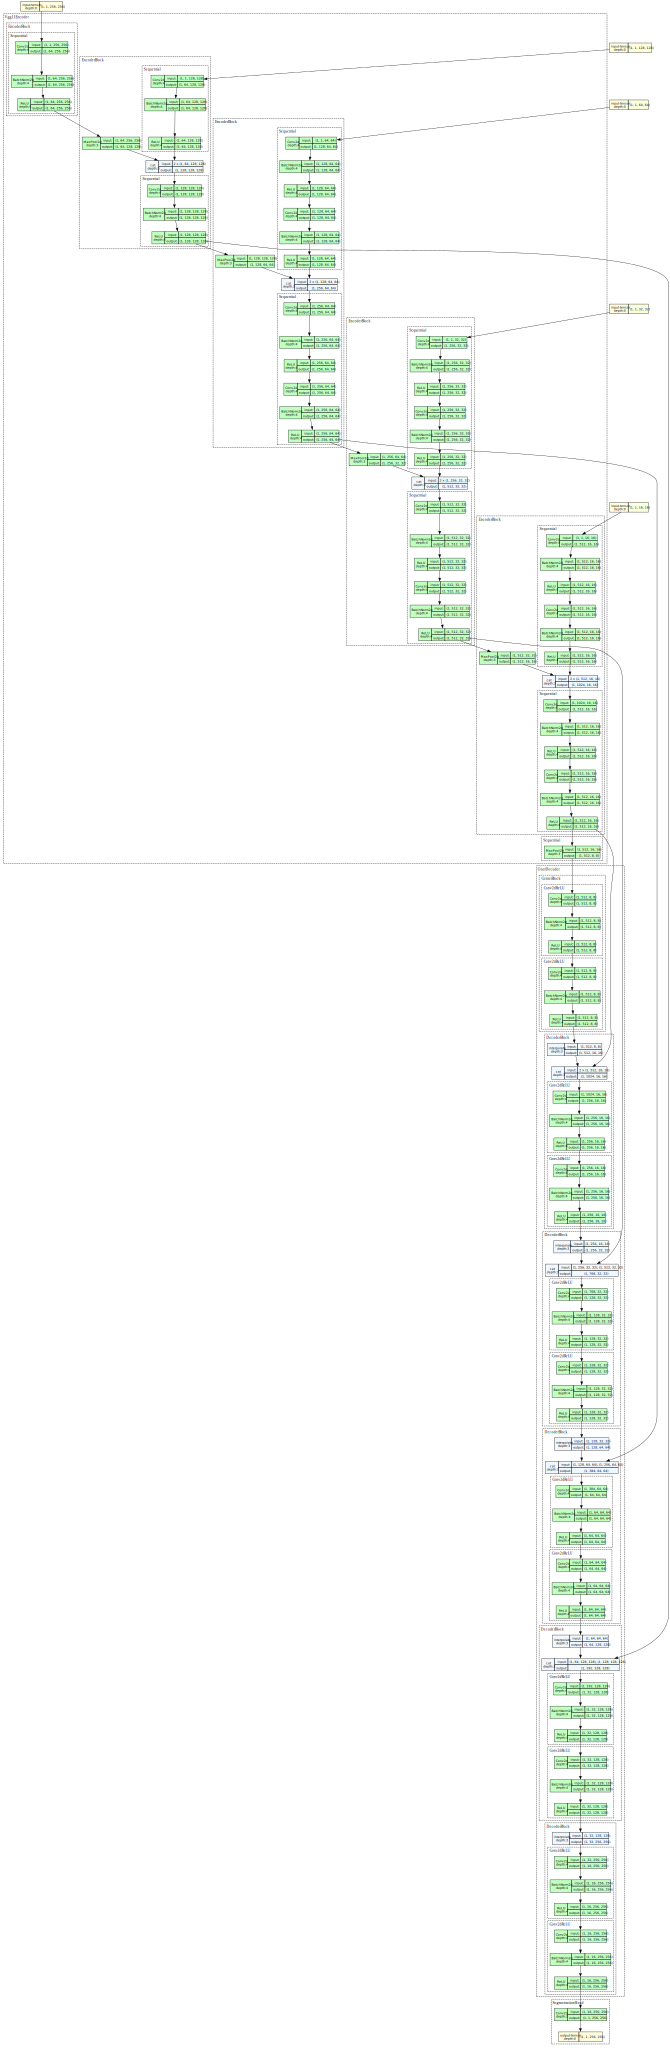

In [7]:
arch = 'unet'
encoder = 'vgg11'
parameters = {"in_channels": 1, "out_channels": 1, "wavelets_mode": 3}
model = get_model(arch, parameters, encoder)
# We are using draw_graph to eval the model graph
model_graph = draw_graph(
    model,
    input_data = input_data,
    #input_size=(1, 1, 256, 256),
    depth=7,
    show_shapes=True,
    expand_nested=True,
    save_graph=True,
    filename=f"{arch}-{encoder}",
    directory="figures",
)
model_graph.visual_graph